In [1]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
D = 25.5
nPx = 101
nSrc = 4
src  = ceo.Source("V", zenith=ceo.constants.ARCMIN2RAD*np.array([0,2,3,4]),
                  azimuth = np.ones(nSrc)*-np.pi/2,
                  rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25.0])
gmt = ceo.GMT_MX(D,nPx)

array([  7.59362684e-04,   2.10433853e-01,   4.65437125e-01,
         8.20719947e-01])

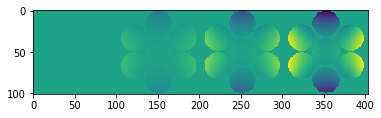

In [3]:
~src
gmt.propagate(src,where_to='exit pupil')
plt.imshow(np.hstack(np.vsplit(src.phase.host(),nSrc)))
src.wavefront.rms(-6)

In [4]:
~src
gmt.propagate(src,where_to='focal plane')
xyzChief = src.rays.chief_coordinates.host()*1e6
print xyzChief
xyz = src.rays.coordinates.host().reshape(nSrc,nPx**2,3)*1e6
V = src.rays.vignetting.host()==1

[[  6.49209555e-24  -2.71373206e-09  -5.82999992e+06]
 [ -7.39612307e-12   1.20787856e+05  -5.83332254e+06]
 [ -1.10962128e-11   1.81214908e+05  -5.83748565e+06]
 [ -1.47987481e-11   2.41681897e+05  -5.84333249e+06]]


In [84]:
diffraction = src.wavelength/25.5*ceo.constants.RAD2MAS
o = np.linspace(0,2*np.pi,101)
x = 0.5*diffraction*np.cos(o)
y = 0.5*diffraction*np.sin(o)

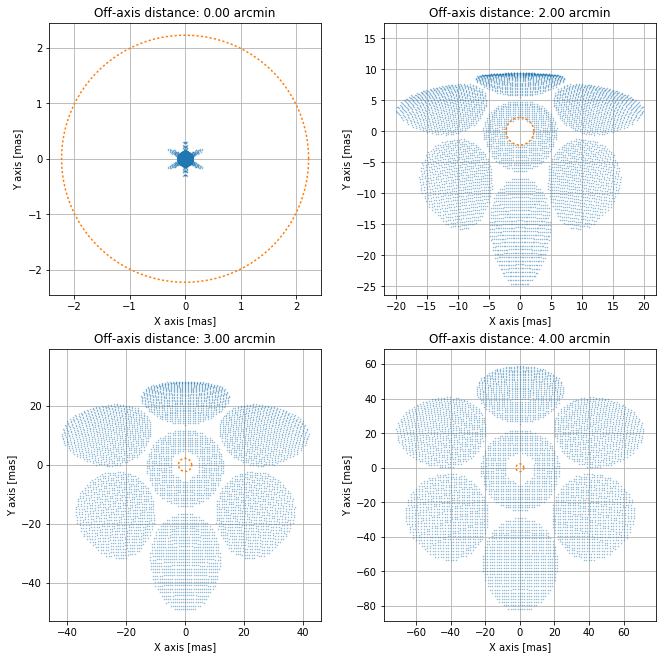

In [85]:
fig,axs = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(11,11)
axs = axs.ravel()
lims = [-12.5,12.5]
xlim = []
ylim = []
for k in range(nSrc):
    xo = src.zenith[k]*ceo.constants.RAD2MAS
    ax = axs[k]
    ax.plot(xyz[k,V[k,:],0]-xyzChief[k,0],xyz[k,V[k,:],1]-xyzChief[k,1],'.',markersize=1,alpha=0.5)
    ax.plot(x,y,'C1:')
    ax.axis('square')
    xlim.append(ax.get_xlim())
    ylim.append(ax.get_ylim())
    #ax.set_xlim(lims)
    #ax.set_ylim(lims)
    ax.grid()
    ax.set_title('Off-axis distance: %.2f arcmin'%(src.zenith[k]*ceo.constants.RAD2ARCMIN))
    ax.set_xlabel('X axis [mas]')
    ax.set_ylabel('Y axis [mas]')

In [86]:
N_PX_IMAGE = 200
img = ceo.Imaging(1,nPx-1,DFT_osf=4,N_PX_IMAGE=N_PX_IMAGE,N_SOURCE=4)
src>>(gmt,img)
+src

OPTICAL PATH: ['GMT_MX', 'Imaging']


In [87]:
print img.frame.shape
frames = np.vsplit(img.frame.host(),4)

(800, 200)


In [88]:
hf = img.pixelScaleArcsec(src)*1e3*N_PX_IMAGE*0.5
print hf

111.22122682


In [89]:
dd = np.array([-diffraction,diffraction])*2

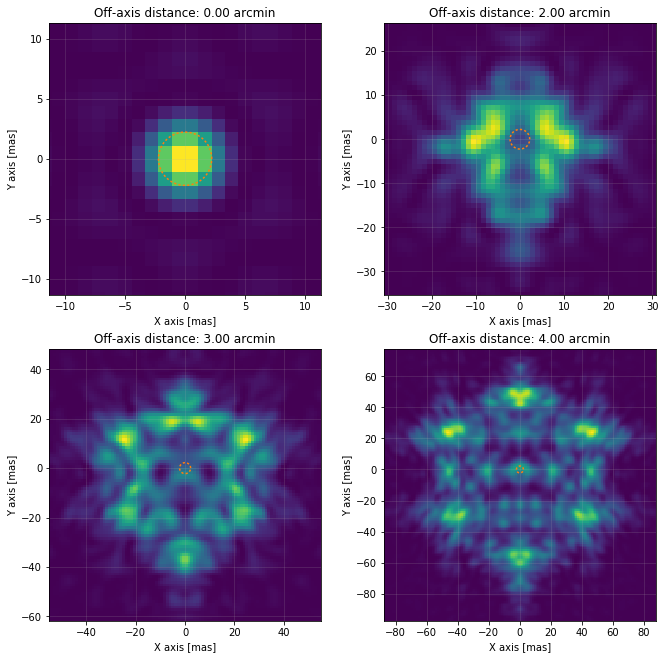

In [90]:
fig,axs = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(11,11)
axs = axs.ravel()
for k in range(nSrc):
    xo = src.zenith[k]*ceo.constants.RAD2MAS
    ax = axs[k]
    ax.imshow(np.flipud(frames[k]),extent=[-hf,hf,-hf,hf])
    ax.plot(x,y,'C1:')
    #ax.axis('square')
    ax.set_xlim(np.array(xlim[k])+dd)
    ax.set_ylim(np.array(ylim[k])+dd)
    ax.grid(alpha=0.2)
    ax.set_title('Off-axis distance: %.2f arcmin'%(src.zenith[k]*ceo.constants.RAD2ARCMIN))
    ax.set_xlabel('X axis [mas]')
    ax.set_ylabel('Y axis [mas]')

# Spot diagram with fixed 2.5" fov

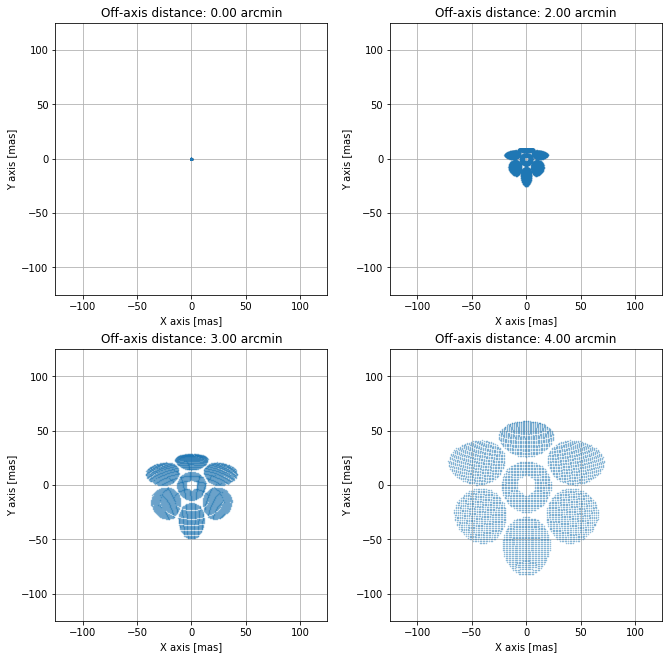

In [7]:
fig,axs = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(11,11)
axs = axs.ravel()
lims = [-125,125]
for k in range(nSrc):
    xo = src.zenith[k]*ceo.constants.RAD2MAS
    ax = axs[k]
    ax.plot(xyz[k,V[k,:],0]-xyzChief[k,0],xyz[k,V[k,:],1]-xyzChief[k,1],'.',markersize=1,alpha=0.5)
    #ax.plot(x,y,'C1:')
    ax.axis('square')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.grid()
    ax.set_title('Off-axis distance: %.2f arcmin'%(src.zenith[k]*ceo.constants.RAD2ARCMIN))
    ax.set_xlabel('X axis [mas]')
    ax.set_ylabel('Y axis [mas]')